## Automating article retrieval in medicine
The medical literature is enormous. Pubmed, a database of medical publications maintained by the U.S. National Library of Medicine, has indexed over 23 million medical publications. Further, the rate of medical publication has increased over time, and now there are nearly 1 million new publications in the field each year, or more than one per minute.

The large size and fast-changing nature of the medical literature has increased the need for automating retrievals of  papers on a particular topic from search databases like Pubmed and then reporting results from the papers found. While such paper searches are often performed manually, with multiple people reviewing each search result, this is tedious and time consuming. In this problem, we will see how text analytics can be used to automate the process of information retrieval.

The dataset consists of the titles (variable title) and abstracts (variable abstract) of papers retrieved in a Pubmed search. Each search result is labeled with whether the paper is a clinical trial testing a drug therapy for cancer (variable trial). These labels were obtained by two people reviewing each search result and accessing the actual paper if necessary, as part of a literature review of clinical trials testing drug therapies for advanced and metastatic breast cancer. This data can be downloaded from the datasets folder on canvas under week6. The dataset is called clinical_trial.csv

In [1]:
import pandas as pd
import sklearn

## Load the data 
- data has titles and abstracts with labels on whether papers are on a clinical trial or not

In [2]:
data = pd.read_csv('clinical_trial.csv')
data = data.fillna('')
data.head()

,title,abstract,trial
0,Treatment of Hodgkin's disease and other cance...,,1
1,Cell mediated immune status in malignancy--pre...,Twenty-eight cases of malignancies of differen...,0
2,Neoadjuvant vinorelbine-capecitabine versus do...,"BACKGROUND: Among breast cancer patients, nonr...",1
3,"Randomized phase 3 trial of fluorouracil, epir...",BACKGROUND: Taxanes are among the most active ...,1
4,Is first-line single-agent mitoxantrone in the...,BACKGROUND: To determine whether patients with...,1


## Exploratory data analysis
- How many characters are there in the longest abstract? (Longest here is defined as the abstract with the largest number of characters.)
- How many search results have no abstract? A paper has no abstract if the number of characters in the abstract field is zero.
- Find the paper with the minimum number of characters in the title. What is the text of the title of this article? Include capitalization and punctuation in your response, but don't include the quotes.

In [3]:
# your code for the questions above
# 2-3 lines of code per question
titles = list(data.title)
ab_len = [len(item) for item in data.abstract]

#1
print(max(ab_len))

#2
print(ab_len.count(0))

#3
print(min(titles, key=len))
    

3708
112
A decade of letrozole: FACE.


## Preparing title data for textual analysis

Use the CountVectorizer() feature extractor in sklearn.feature_extraction.text to build a term-document matrix for paper titles.

- make an instance vec of CountVectorizer() with stop_words='english' and min_df = 0.05
- use the fit_transform method of vec to transform the column data.title into a term document matrix tdm (of type scipy.sparse.csr.csr_matrix)
- make a new pandas dataframe called df_title with tdm (converted to a regular numpy array using .toarray()) with columns equal to the feature names of vec (vec.get_feature_names())
- What is the most frequent word across all the titles? Hint: you can use .sum() to compute the frequency of a word across all the titles.

In [4]:
# your code here
# about 4-5 lines of code
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', min_df=.05)

X = cv.fit_transform(data['title'])
df_title = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
df_title.sum().sort_values(ascending=False)


breast              1706
cancer              1644
patients             637
trial                628
chemotherapy         527
study                495
adjuvant             429
phase                418
randomized           412
metastatic           380
advanced             325
treatment            319
tamoxifen            309
therapy              286
ii                   279
women                227
versus               222
positive             209
group                206
results              189
dose                 185
cyclophosphamide     184
postmenopausal       176
node                 169
plus                 152
high                 147
docetaxel            139
early                136
doxorubicin          135
combination          132
clinical             131
fluorouracil         130
receptor             126
iii                  125
line                 107
controlled           105
response             104
negative             102
randomised            97
risk                  95


## Preparing abstract data for textual analysis

Use the CountVectorizer() feature extractor in sklearn.feature_extraction.text to build a term-document matrix for paper abstracts.

- make an instance vec_abs of CountVectorizer() with stop_words='english' and min_df = 0.05
- use the fit_transform method of vec_abs to transform the column data.abstract into a term document matrix tdm_abs (of type scipy.sparse.csr.csr_matrix)
- make a new pandas dataframe called df_abstract with tdm_abs (converted to a regular numpy array using .toarray()) with columns equal to the feature names of vec_abs (vec_abs.get_feature_names())
- What is the most frequent word across all the abstracts? Hint: you can use .sum() to compute the frequency of a word across all the abstracts.

In [5]:
# your code here
# about 4-5 lines of code

abstracts = CountVectorizer(stop_words='english', min_df=.05)

X = abstracts.fit_transform(data['abstract'])
df_abstract = pd.DataFrame(X.toarray(), columns=abstracts.get_feature_names())
df_abstract.sum().sort_values(ascending=False)

patients           8078
breast             3942
cancer             3640
treatment          2880
mg                 2570
chemotherapy       2456
group              1922
survival           1902
response           1779
tamoxifen          1712
study              1571
therapy            1534
months             1521
women              1490
results            1375
dose               1323
disease            1317
adjuvant           1194
positive           1185
median             1179
years              1168
trial              1147
randomized         1054
significant        1050
treated             994
95                  978
overall             956
compared            944
significantly       903
received            867
                   ... 
43                  120
studied             117
shown               117
endpoint            116
improve             115
completed           115
77                  114
alopecia            114
times               113
performance         113
41              

## Convert column names in df_title and df_abstract
- append the string 't_' to the names of columns in df_title
- append the string 'a_' to the names of columns in df_abstract

In [8]:
# your code here (about 2 lines)
df_title.columns = ['t_' + x for x in df_title.columns]
df_abstract.columns = ['a_' + x for x in df_abstract.columns]

## Construct a new dataframe by combining df_title and df_abstract
- concatenate the two dataframes along axis = 1
- Then construct a 2d numpy array X with the values in this new dataframe (these are the features of the term-document model)
- make the numpy vector y be the values in data['trial'] (the labels)

In [9]:
import numpy as np
matrix1 = pd.concat([df_title, df_abstract], axis=1)

X = matrix1.values
y = data['trial'].values

## Build a decision tree with X and y
- First split X,y into a train and test set (test size = 30%)
- fit sklearn's DecisionTreeClassifier with max_depth of 3 on the training X and y

In [10]:
# remember to import sklearn's model_selection, tree modules
# about 3-4 lines of code (not counting the imports)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Visualize the constructed decision tree using graphviz
- see the dtrees.ipynb notebook for an example
- which feature is at the root of the decision tree?

In [17]:
# your viz code here
from graphviz

dot_data = sklearn.tree.export_graphviz(clf, out_file=None, feature_names=matrix1.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)  
graph

AttributeError: 'function' object has no attribute 'Source'

## Evaluate performance of learned decision tree on the training X and y
- calculate confusion matrix with training set
- calculate specificity and sensitivity on training set
- calculate training set AUC
- use .predict() and .predict_proba() on the classifier to predict labels and to predict probabilities of the two classes

In [18]:
# 8-10 lines of code here using sklearn metrics functions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

y_pred_dis = clf.predict(X_train)
y_pred = clf.predict_proba(X_train)

print(confusion_matrix(y_train, y_pred_dis))
print ('Training set accuracy: ' + str(accuracy_score(y_train, y_pred_dis)))

tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_pred_dis).ravel()
spec1 = tn1 / (tn1 + fp1)
sens1 = tp1 / (tp1 + fn1)

print ('Specificity: ' + str(spec1))
print ('Sensitivity: ' + str(sens1))
print ('Training AUC: ' + str(roc_auc_score(y_train, y_pred[:,1])))

[[637  93]
 [203 369]]
Training set accuracy: 0.7726574500768049
Specificity: 0.8726027397260274
Sensitivity: 0.6451048951048951
Training AUC: 0.8292640578599484


## Evaluate performance of learned decision tree on the set aside test X and y
- calculate confusion matrix with training set
- calculate specificity and sensitivity on training set
- calculate training set AUC
- use .predict() and .predict_proba() on the classifier to predict labels and to predict probabilities of the two classes

In [19]:
# 8-10 lines of code here using sklearn metrics functions
y_pred_dis = clf.predict(X_test)
y_pred = clf.predict_proba(X_test)

print(confusion_matrix(y_test, y_pred_dis))
print ('Training set acc' + str(accuracy_score(y_test, y_pred_dis)))

tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_dis).ravel()
spec2 = tn2 / (tn2 + fp2)
sens2 = tp2 / (tp2 + fn2)

print ('Specificity: ' + str(spec2))
print ('Sensitivity: ' + str(sens2))
print ('Test AUC: ' + str(roc_auc_score(y_test, y_pred[:,1])))

[[273  40]
 [ 95 150]]
Training set acc0.7580645161290323
Specificity: 0.8722044728434505
Sensitivity: 0.6122448979591837
Test AUC: 0.8275542804981416


## Vary max_depth in your classifier definition 
- Describe the impact on classifier performance in the training and the test set.
- test out depths from 1 to 10 and compute training set AUC and test set AUC for each tree with a 70/30 train/test split
- plot depth on x-axis and AUC on y-axis for both training and test set
- to what depth should you grow a tree for this problem?

In [20]:
# your code here varying classifier depth
# about 14-15 lines of code
import numpy as np
depthData = pd.DataFrame(columns=['trainAUC', 'testAUC'])

depths = np.arange(1,11)
trainAUCs = []
testAUCs = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_predTest = clf.predict_proba(X_test)
    y_predTrain = clf.predict_proba(X_train)
    depthData.at[depth,'trainAUC'] = roc_auc_score(y_train, y_predTrain[:,1])
    depthData.at[depth,'testAUC'] = roc_auc_score(y_test, y_predTest[:,1])

    
    
    
#     trainAUCs.append(roc_auc_score(y_train, ypredTrain[:,1]))
#     testAUCs.append(roc_auc_score(y_test, ypredTest[:,1]))


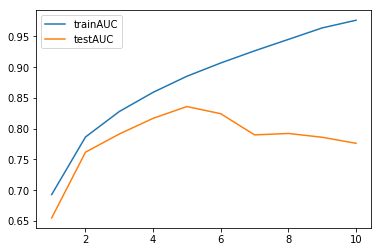

In [24]:
depthData.plot(use_index=True)


## Understanding the impact of false positives and false negatives in the prediction process

 
A researcher searching for relevant papers on clinical trials in the medical literature would use a model like the one we built above, in the following workflow:

1) For all of the papers retrieved in a keyword-based PubMed Search, predict which papers are clinical trials using our model. This yields some initial Set A of papers predicted to be trials, and some Set B of papers predicted not to be trials. 

2) Then, the researcher manually reviews all papers in Set A, verifying that each paper meets the inclusion criteria (for the purposes of this analysis, we assume this manual review is 100% accurate at identifying whether a paper in Set A is a relevant paper on clinical trials). This yields a more limited set of papers to be analyzed further, which would ideally be all papers in the medical literature meeting the relevance criteria (be about a clinical trial in breast cancer).

3) Perform the required analysis, using data extracted from the limited set of papers identified in step 2.

Now pick the best choice for the three questions below.

## Question 1
What is the cost associated with the model in Step 1 making a false negative prediction?

- A: A paper will be mistakenly added to Set A, yielding additional work in Step 2 of the process but not affecting the quality of the results of Step 3.
- B: A paper will be mistakenly added to Set A, definitely affecting the quality of the results of Step 3.
- #### C: A paper that should have been included in Set A will be missed, affecting the quality of the results of Step 3. 
- D: There is no cost associated with a false negative prediction.


## Question 2
What is the cost associated with the model in Step 1 making a false positive prediction?

- #### A: A paper will be mistakenly added to Set A, yielding additional work in Step 2 of the process but not affecting the quality of the results of Step 3. 
- B: A paper will be mistakenly added to Set A, definitely affecting the quality of the results of Step 3.
- C: A paper that should have been included in Set A will be missed, affecting the quality of the results of Step 3.
- D: There is no cost associated with a false positive prediction.


## Question 3
Given the costs associated with false positives and false negatives, which of the following is most accurate?


- A: A false positive is more costly than a false negative; the decision maker should use a probability threshold greater than 0.5 for the machine learning model.
- B: A false positive is more costly than a false negative; the decision maker should use a probability threshold less than 0.5 for the machine learning model.
- C: A false negative is more costly than a false positive; the decision maker should use a probability threshold greater than 0.5 for the machine learning model.
- #### D: A false negative is more costly than a false positive; the decision maker should use a probability threshold less than 0.5 for the machine learning model. 